In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")

In [56]:
df = pd.read_csv('content_based_recommendation_dataset.csv')

### Understanding Dataset

In [57]:
df.head()

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,male,500,4.5,PUMA,0.8,200,No,winter,plains,0.9
1,8,2,3.8,female,3000,3.2,Lee,-0.4,300,Yes,monsoon,mountains,0.2
2,25,10,4.5,female,600,4.8,Head Hunters,0.6,1000,No,spring,plains,0.7
3,6,1,2.1,female,100,2.5,Johnson & Johnson,0.1,300,No,summer,coastal,0.1
4,18,5,4.7,male,2000,4.3,Wakefit,0.9,700,Yes,winter,plains,0.8


In [58]:
df.tail()

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
1469,5,1,1.8,male,200,2.0,Kama Ayurveda,-0.90,300,Yes,spring,coastal,0.01
1470,37,13,4.7,female,900,4.6,Johnson & Johnson,0.75,600,No,summer,plains,0.77
1471,22,8,3.9,male,4000,4.1,SleepyCat,0.60,900,Yes,winter,mountains,0.76
1472,40,15,4.8,female,700,4.9,Flying Machine,0.90,500,No,summer,mountains,0.82
1473,12,4,3.0,male,5000,3.2,Head Hunters,0.10,600,No,summer,plains,0.41


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 13 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Number of clicks on similar products                         1474 non-null   int64  
 1   Number of similar products purchased so far                  1474 non-null   int64  
 2   Average rating given to similar products                     1474 non-null   float64
 3   Gender                                                       1474 non-null   object 
 4   Median purchasing price (in rupees)                          1474 non-null   int64  
 5   Rating of the product                                        1474 non-null   float64
 6   Brand of the product                                         1474 non-null   object 
 7   Customer review sentiment score (overall)                    1474 non-null   f

In [60]:
df.describe()

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Median purchasing price (in rupees),Rating of the product,Customer review sentiment score (overall),Price of the product,Probability for the product to be recommended to the person
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,20.846676,9.225237,3.970963,2720.284939,4.059430,0.473474,1142.910448,0.674562
std,11.315669,5.356612,0.832315,3045.898434,0.829928,0.503922,1961.069130,0.317863
min,0.000000,0.000000,0.000000,100.000000,0.000000,-1.000000,90.000000,0.000000
25%,11.000000,5.000000,3.400000,500.000000,3.500000,0.100000,400.000000,0.450000
50%,19.000000,9.000000,4.200000,1000.000000,4.300000,0.700000,600.000000,0.800000
75%,28.750000,13.000000,4.700000,5000.000000,4.800000,0.900000,900.000000,0.900000
max,55.000000,24.000000,5.000000,19000.000000,5.000000,1.000000,10000.000000,1.000000


In [61]:
# Checking for null values
df.isnull().sum()

Number of clicks on similar products                           0
Number of similar products purchased so far                    0
Average rating given to similar products                       0
Gender                                                         0
Median purchasing price (in rupees)                            0
Rating of the product                                          0
Brand of the product                                           0
Customer review sentiment score (overall)                      0
Price of the product                                           0
Holiday                                                        0
Season                                                         0
Geographical locations                                         0
Probability for the product to be recommended to the person    0
dtype: int64

In [62]:
# Categorizing Features:
num_features = ['Number of clicks on similar products', 
                'Number of similar products purchased so far', 
                'Average rating given to similar products',
                'Median purchasing price (in rupees)',
                'Rating of the product',
                'Customer review sentiment score (overall)',
                'Price of the product',
                'Probability for the product to be recommended to the person']
catg_features = ['Gender','Brand of the product','Holiday','Season','Geographical locations']

# Exploratory Data Analysis

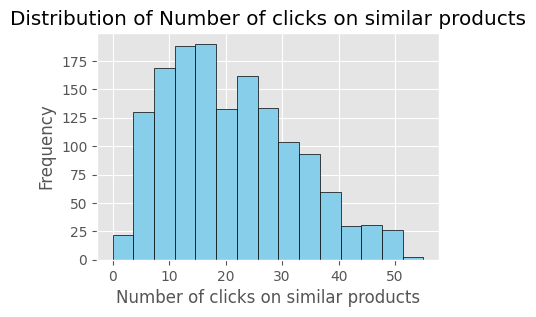

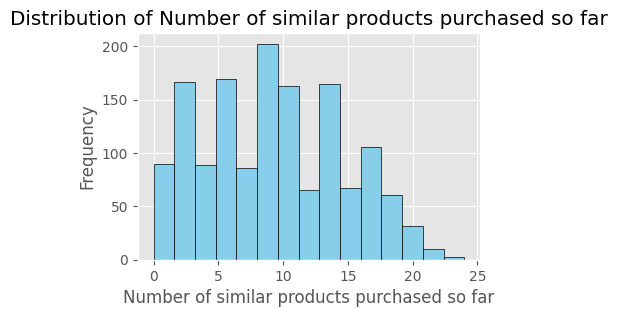

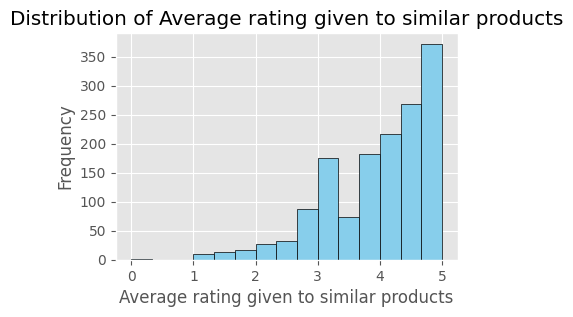

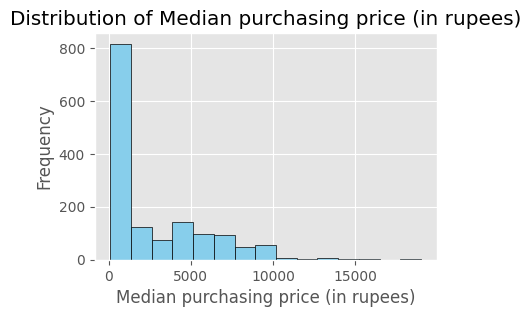

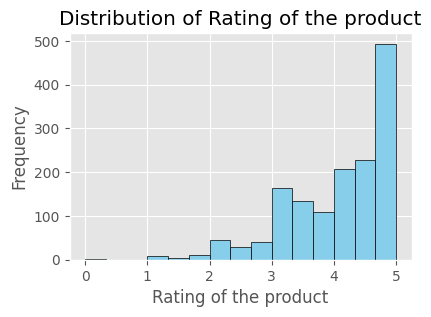

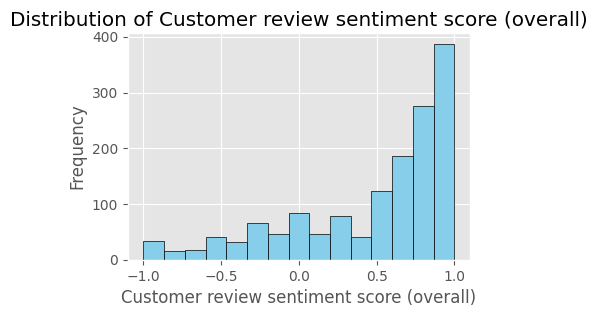

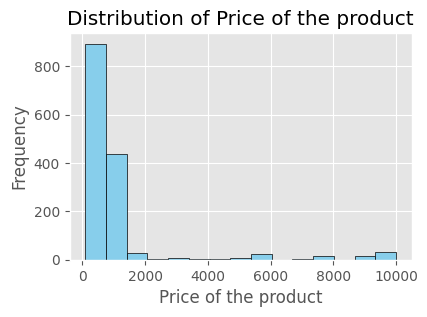

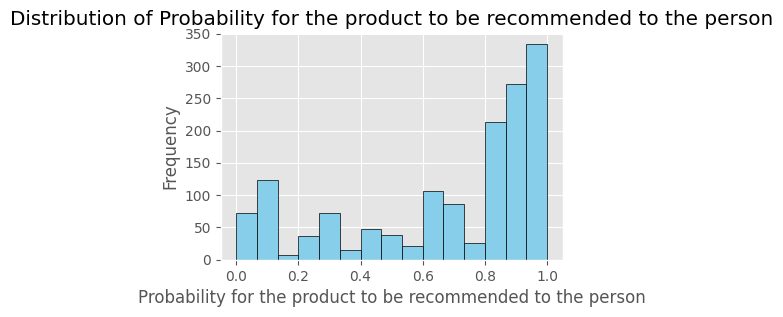

In [63]:
# Histograms For numerical Features:
for i, feature in enumerate(num_features,1):
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i)
    plt.hist(df[feature], bins=15, color = 'skyblue', edgecolor = 'black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.show()

In [64]:
catg_features = ['Gender','Brand of the product','Holiday','Season','Geographical locations']
gender = df['Gender'].value_counts()
bdp = df['Brand of the product'].value_counts()
holiday = df['Holiday'].value_counts()
season = df['Season'].value_counts()
Geo_location = df['Geographical locations'].value_counts()
li1 = [gender,bdp,holiday,season,Geo_location]
for i in enumerate(li1,1):
    print(i,'\n')

(1, Gender
male      754
female    720
Name: count, dtype: int64) 

(2, Brand of the product
Wildcraft                          161
Manyavar Mohey                     111
Pepe Jeans London                   85
Lakme Ayurveda                      79
Johnson & Johnson                   76
Pepperfry                           75
Flying Machine                      70
Patanjali Ayurved (Health Care)     68
Lee                                 65
Wakefit                             59
Sugar Cosmetics                     42
Fastrack                            41
Head Hunters                        41
Urban Ladder                        38
Khadi Essentials                    34
Forest Essentials                   33
Kama Ayurveda                       32
Max                                 29
Himalaya Liv.52                     29
PUMA                                25
The Moms Co.                        23
Dettol                              21
Streax                              20
SleepyCat 

Text(0, 0.5, 'Frequency')

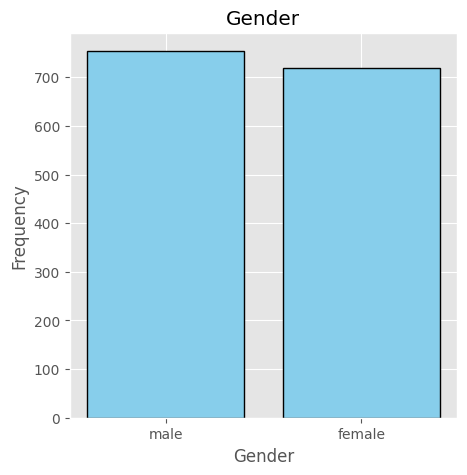

In [65]:
plt.figure(figsize=(5,5))
bar_plot = plt.bar(gender.index, gender.values, color = 'skyblue', edgecolor = 'black', linewidth = 1)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

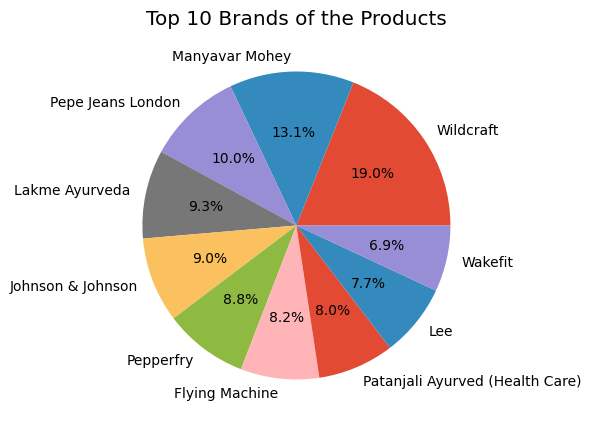

In [66]:
bdp = pd.Series(df['Brand of the product'].value_counts())
bdp_10 = bdp.head(10)
plt.figure(figsize=(10,5))
pie_plot = plt.pie(bdp_10.values, labels = bdp_10.index,autopct=('%1.1f%%'))
plt.title('Top 10 Brands of the Products')
plt.show()

Text(0, 0.5, 'Frequency')

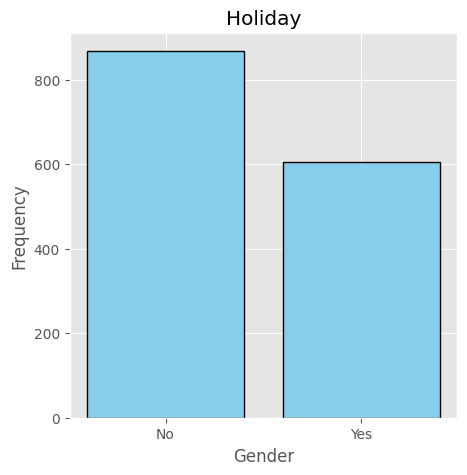

In [67]:
plt.figure(figsize=(5,5))
bar_plot = plt.bar(holiday.index, holiday.values, color = 'skyblue', edgecolor = 'black', linewidth = 1)
plt.title('Holiday')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

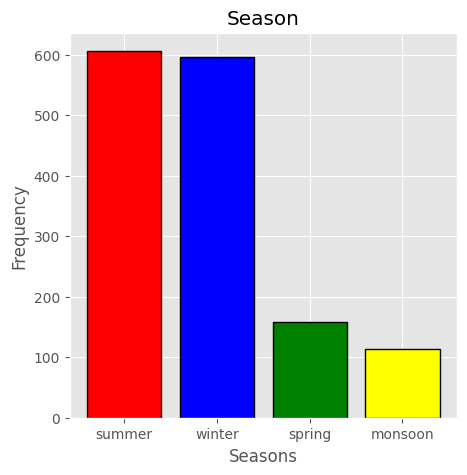

In [68]:
plt.figure(figsize=(5,5))
colors = ['red','blue','green','yellow']
bar_plot = plt.bar(season.index, season.values, color = colors, edgecolor = 'black', linewidth = 1)
plt.title('Season')
plt.xlabel('Seasons')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

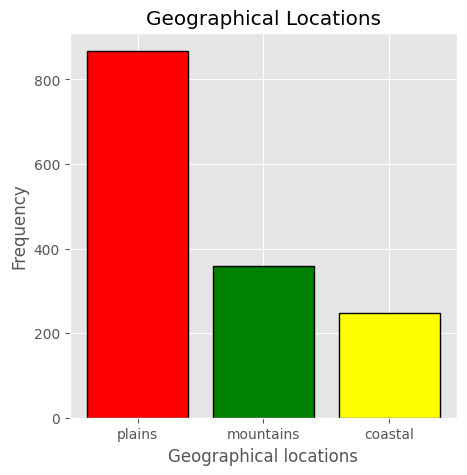

In [69]:
plt.figure(figsize=(5,5))
colors = ['red','green','yellow']
bar_plot = plt.bar(Geo_location.index, Geo_location.values, color = colors, edgecolor = 'black', linewidth = 1)
plt.title('Geographical Locations')
plt.xlabel('Geographical locations')
plt.ylabel('Frequency')

# Customer Segmentation

In [70]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [71]:
df1 = df.copy()

In [72]:
label_encoder = LabelEncoder()
for feature in catg_features:
    df1[feature] = label_encoder.fit_transform(df1[feature])

In [73]:
df1.head()

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,1,500,4.5,29,0.8,200,0,3,2,0.9
1,8,2,3.8,0,3000,3.2,20,-0.4,300,1,0,1,0.2
2,25,10,4.5,0,600,4.8,14,0.6,1000,0,1,2,0.7
3,6,1,2.1,0,100,2.5,16,0.1,300,0,2,0,0.1
4,18,5,4.7,1,2000,4.3,43,0.9,700,1,3,2,0.8


In [74]:
std_scaler = StandardScaler()
scaled_data = pd.DataFrame(std_scaler.fit_transform(df1))

In [75]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.782073,-0.975805,0.275274,0.977194,-0.729190,0.531033,0.253704,0.648190,-0.480978,-0.835558,0.958968,0.761589,0.709469
1,-1.135685,-1.349302,-0.205477,-1.023339,0.091865,-1.035899,-0.448935,-1.733937,-0.429968,1.196805,-2.398559,-0.551373,-1.493483
2,0.367166,0.144686,0.635837,-1.023339,-0.696348,0.892633,-0.917361,0.251168,-0.072898,-0.835558,-1.279383,0.761589,0.080054
3,-1.312491,-1.536051,-2.248667,-1.023339,-0.860559,-1.879632,-0.761219,-0.741385,-0.429968,-0.835558,-0.160208,-1.864334,-1.808190
4,-0.251655,-0.789057,0.876212,0.977194,-0.236557,0.289967,1.346699,0.846700,-0.225928,1.196805,0.958968,0.761589,0.394761


In [76]:
inertia = []
K = range (1,11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
inertia

[19162.000000000004,
 13218.651930864216,
 11215.743283596628,
 10209.515387269323,
 9459.676415770735,
 8814.038770838197,
 8098.670090501242,
 7580.291284029185,
 7260.741045720581,
 6798.125689524006]

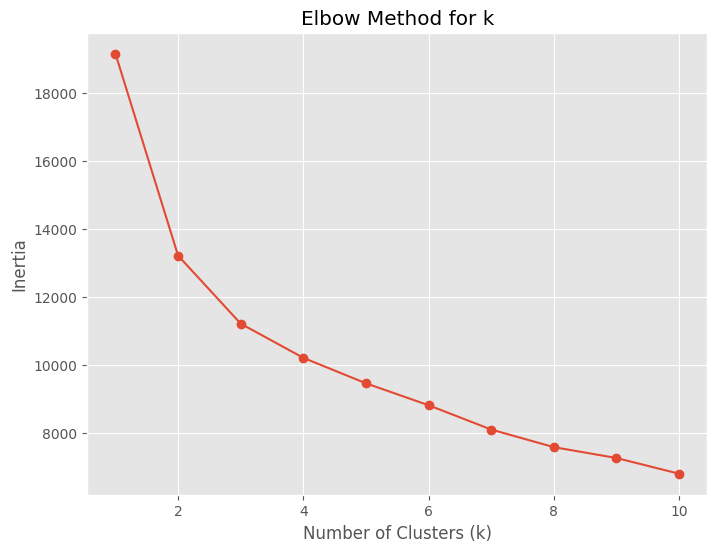

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## We Take k = 4, observing fron the graph, therefore number of clusters = 4

In [78]:
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
df['Clusters'] = kmeans.fit_predict(scaled_data)

In [79]:
df.head()

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person,Clusters
0,12,4,4.2,male,500,4.5,PUMA,0.8,200,No,winter,plains,0.9,2
1,8,2,3.8,female,3000,3.2,Lee,-0.4,300,Yes,monsoon,mountains,0.2,3
2,25,10,4.5,female,600,4.8,Head Hunters,0.6,1000,No,spring,plains,0.7,2
3,6,1,2.1,female,100,2.5,Johnson & Johnson,0.1,300,No,summer,coastal,0.1,3
4,18,5,4.7,male,2000,4.3,Wakefit,0.9,700,Yes,winter,plains,0.8,2


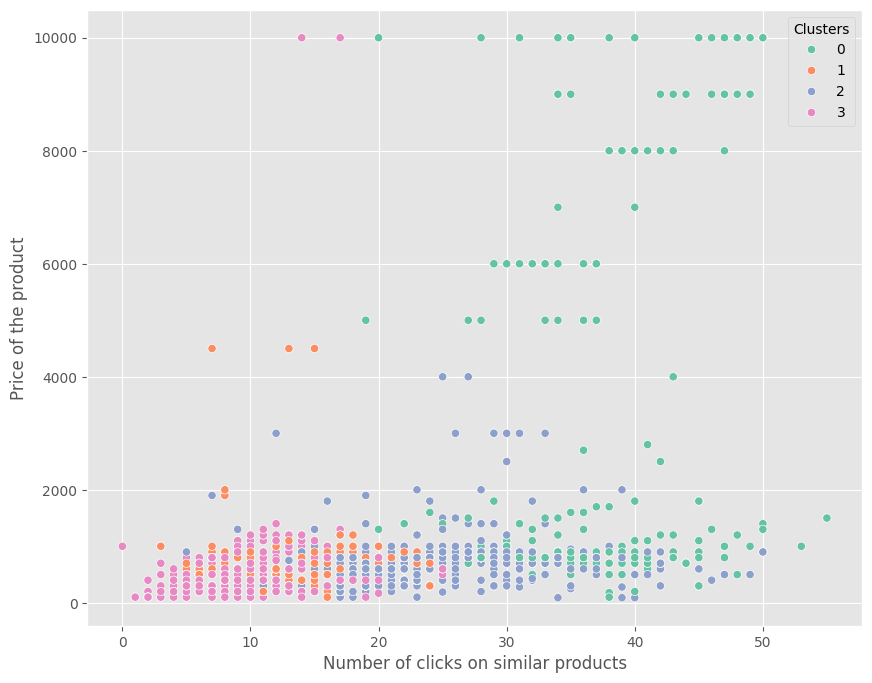

In [80]:
plt.figure(figsize = (10,8))
sns.scatterplot (data = df, x = 'Number of clicks on similar products', y = 'Price of the product', hue = 'Clusters', palette = 'Set2' )
plt.legend (title = 'Clusters')
plt.show()

# Recommendation System

Content-Based Recommendation System

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
df3 = df.copy()

In [83]:
recommendation_cols = ['Price of the product',
                        'Rating of the product',
                        'Customer review sentiment score (overall)',
                        'Brand of the product']

In [84]:
recommendation_cols

['Price of the product',
 'Rating of the product',
 'Customer review sentiment score (overall)',
 'Brand of the product']

In [85]:
df3['Brand of the product'] = label_encoder.fit_transform(df3['Brand of the product'])

In [86]:
df3.head()

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person,Clusters
0,12,4,4.2,male,500,4.5,29,0.8,200,No,winter,plains,0.9,2
1,8,2,3.8,female,3000,3.2,20,-0.4,300,Yes,monsoon,mountains,0.2,3
2,25,10,4.5,female,600,4.8,14,0.6,1000,No,spring,plains,0.7,2
3,6,1,2.1,female,100,2.5,16,0.1,300,No,summer,coastal,0.1,3
4,18,5,4.7,male,2000,4.3,43,0.9,700,Yes,winter,plains,0.8,2


In [87]:
product_features = df3[recommendation_cols]

In [88]:
similarity_matrix = cosine_similarity(product_features)

In [89]:
similarity_matrix

array([[1.        , 0.99692337, 0.99140637, ..., 0.99420144, 0.9919951 ,
        0.99257997],
       [0.99692337, 1.        , 0.99859973, ..., 0.99956456, 0.99881558,
        0.99905018],
       [0.99140637, 0.99859973, 1.        , ..., 0.9997177 , 0.99997879,
        0.99995624],
       ...,
       [0.99420144, 0.99956456, 0.9997177 , ..., 1.        , 0.99979035,
        0.99989545],
       [0.9919951 , 0.99881558, 0.99997879, ..., 0.99979035, 1.        ,
        0.99997448],
       [0.99257997, 0.99905018, 0.99995624, ..., 0.99989545, 0.99997448,
        1.        ]])

In [90]:
def get_recommendation(product_id, num_recommendation = 5):
    similarity_score = list(enumerate(similarity_matrix[product_id]))
    similarity_score = sorted(similarity_score, key = lambda x: x[1], reverse = True)
    most_similarity_score = [idx for idx, score in similarity_score[1:num_recommendation+1]]
    return df3.iloc[most_similarity_score]

In [91]:
# Example product index to get top 5 recommended products based on thier index.
eg_product_id = 0
recommendtions = get_recommendation(eg_product_id, num_recommendation = 5 )
print(recommendtions)

      Number of clicks on similar products  \
32                                      19   
122                                     18   
1247                                    20   
737                                     38   
91                                      23   

      Number of similar products purchased so far  \
32                                              7   
122                                             8   
1247                                            3   
737                                            15   
91                                             10   

      Average rating given to similar products  Gender  \
32                                         4.2    male   
122                                        4.0    male   
1247                                       3.2    male   
737                                        4.6  female   
91                                         4.5    male   

      Median purchasing price (in rupees)  Rating of th